<a href="https://colab.research.google.com/github/KurniaKhaikal/EDA_MYDORMYHOSTELUMM/blob/main/EDA_MyDormyHostelUMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 5.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=d17379c357b71b8a4371cd3930690d1f43e5e63537a69a3994e8d0f4a39e0fdc
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry as pc
import matplotlib.ticker as mtick

pd.options.display.max_columns = None

In [32]:
data = pd.read_csv('/content/NewData_Juli.csv')

data.head(10)

,No,Hari,Data Cust,No Kamar,TYPE,Ket. Batal
0,1,1,Annastasia Graziani - 081230242124 / 08224410...,A205,Room Breakfast,0
1,2,1,Ms SYAHRENI SYAHRENI - TIKET.COM ID 16978135 -...,A206,Room Breakfast,0
2,3,1,Kenrick loekmana - AGODA ID 685769349 - 1 KAMA...,A207,Room Only,0
3,4,1,Rama Yudonegoro - FIT WA - 1 malam RO - Rate 2...,A208,Room Only,0
4,5,1,Salma Salsabilla - TIKET.COM ID 16862071 - 4 M...,B102,Room Only,0
5,6,1,Audhinata Bebytama Rizky - WIG Ramadhan 2 mala...,B103,Room Breakfast,0
6,7,1,Desi - FIT WA - 08161819706 - 2 malam RO - rat...,B206,Room Only,0
7,8,1,Metty Noviyanti - AGODA ID 686564149 - 1 KAMAR...,B208,Room Only,0
8,9,1,Andrew Valentino - TIKET.COM ID 16970986 - 1 M...,C205,Room Only,0
9,10,1,Dilan Fedya Lesnussa - WIG - 1 KAMAR 1 MALAM -...,C206,Room Only,0


In [33]:
df = data.copy()

In [34]:
df.shape

(268, 6)

In [35]:
data.isnull().sum().sort_values(ascending=False)[:39]

No            0
Hari          0
Data Cust     0
No Kamar      0
TYPE          0
Ket. Batal    0
dtype: int64

In [36]:
df.dtypes

No             int64
Hari           int64
Data Cust     object
No Kamar      object
TYPE          object
Ket. Batal     int64
dtype: object

In [37]:
print(df.shape)

(268, 6)


In [38]:
df.describe()

,No,Hari,Ket. Batal
count,268.000000,268.000000,268.000000
mean,134.500000,4.261194,0.048507
std,77.509139,1.919461,0.215238
min,1.000000,1.000000,0.000000
25%,67.750000,3.000000,0.000000
50%,134.500000,4.000000,0.000000
75%,201.250000,6.000000,0.000000
max,268.000000,7.000000,1.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   No          268 non-null    int64 
 1   Hari        268 non-null    int64 
 2   Data Cust   268 non-null    object
 3   No Kamar    268 non-null    object
 4   TYPE        268 non-null    object
 5   Ket. Batal  268 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 12.7+ KB


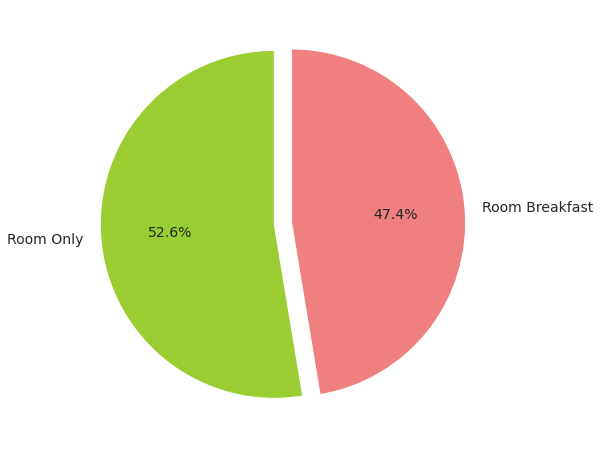

In [40]:
plt.rcParams['figure.figsize'] = 8,8

labels = df['TYPE'].value_counts().index.tolist()

sizes = df['TYPE'].value_counts().tolist()

explode = (0, 0.1)

colors = ['yellowgreen', 'lightcoral']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()

In [41]:
#Checking the missing values in the columns

df.isnull().sum()

No            0
Hari          0
Data Cust     0
No Kamar      0
TYPE          0
Ket. Batal    0
dtype: int64

In [42]:
df_not_canceled = df[df['TYPE'] == 0]

In [43]:
def get_count(series, limit=None):
    
    
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values

In [44]:
def plot(x, y, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar'):
    
    
    sns.set_style('darkgrid')
    
    fig, ax = plt.subplots(figsize=figsize)
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x,y, ax = ax)
    elif type == 'line':
        sns.lineplot(x,y, ax = ax, sort=False)
        
    
    plt.show()

In [45]:
x,y = get_count(df['Ket. Batal'])

In [46]:
x,y

(array([0, 1]), array([95.14925373,  4.85074627]))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


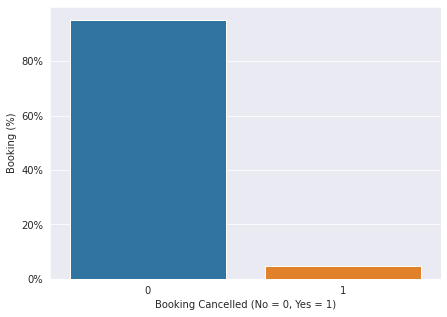

In [47]:
plot(x,y, x_label='Booking Cancelled (No = 0, Yes = 1)', y_label='Booking (%)')

In [48]:
df_not_canceled = df[df['Ket. Batal'] == 0]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


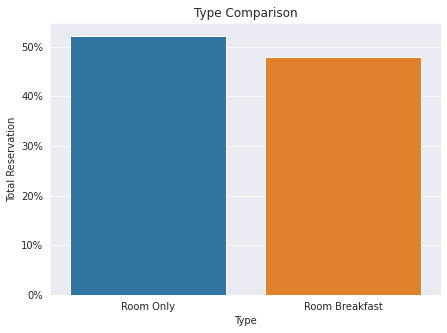

In [49]:
x,y = get_count(df_not_canceled['TYPE'])
plot(x,y, x_label='Type', y_label='Total Reservation', title='Type Comparison')

In [50]:
df[['Hari']] = df[['Hari']].astype('int64')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


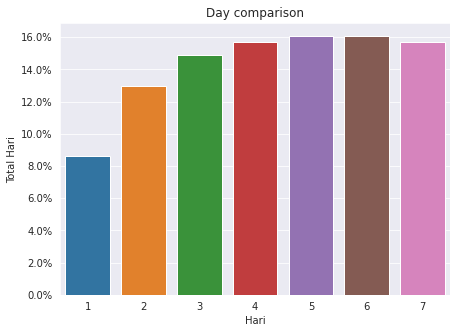

In [51]:
"""
1 : Minggu
2 : Senin
3 : Selasa
4 : Rabu
5 : Kamis
6 : Jumat
7 : Sabtu
"""


x,y = get_count(df_not_canceled['Hari'])
plot(x,y, x_label='Hari', y_label='Total Hari', title='Day comparison')

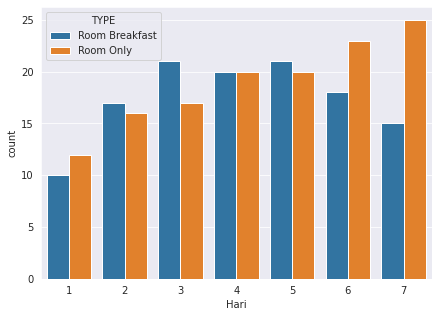

In [52]:
plt.subplots(figsize=(7,5))
sns.countplot(x='Hari', hue='TYPE',  data=df_not_canceled);